In [1]:
# Step 1 - import packages
import pandas as pd
import pylab as plt
import re
import seaborn as sns
import warnings


In [2]:
# Step 2 - jupyter notebook configuration

# Warnings ignore
warnings.simplefilter('ignore')

# Show complete dataset in
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib
%matplotlib inline

In [3]:
# Step 3 - define custom functions

'''replace_regex - replace regex patterns for an string in a DataFrame col
Params:
1. repl_dict : Dictionary - contains regex patterns to replace
2. df        : DataFrame  - df object
3. col       : String     - col name

Return       : Bool

'''

def replace_regex(repl_dict, df, col):
    try:
        for key in repl_dict:
            for el in repl_dict[key]:
                df[col]=df[col].str.replace(el, key, regex=True)
        return True
    except:
        return False


'''get_year - obtain year from an string input
Params:
1. s     : String - the input string

Return   : String - the year extracted

'''

def get_year(s):
    match = re.search("([0-9]{4})", s)
    if match:
        return match.group(0)
    # else:
    #    return "2000"

# Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec


'''get_date - obtain date from an string input
Params:
1. s     : String - the input string

Return   : String - the date extracted

'''

def get_date(s):
    match = re.search("([0-9]{2}-(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)-[0-9]{4})", s)
    if match:
        return match.group(0)

    match = re.search("((Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)-[0-9]{4})", s)
    if match:
        return match.group(0)

    match = re.search("([0-9]{4})", s)
    if match:
        return match.group(0)
    else:
        return "2000"


def get_time(s):
    match = re.search("([0-9]{2}h[0-9]{2})", s)
    if match:
        return match.group(0)

    match = re.search("(fter)", s)
    if match:
        return "Afternoon"

    match = re.search("(orning)", s)
    if match:
        return "Morning"

    match = re.search("(vening)", s)
    if match:
        return "Evening"

    match = re.search("(unch)", s)
    if match:
        return "Lunch"

    match = re.search("(ight)", s)
    if match:
        return "Night"

    match = re.search("(unset)", s)
    if match:
        return "Sunset"

    match = re.search("(dusk)", s)
    if match:
        return "Night"

    match = re.search("(iddday)", s)
    if match:
        return "Midday"

    else:
        return "Unknown"


In [4]:
# Step 4 - import csv
sharks_ori=pd.read_csv('./attacks.csv', encoding="latin1")

In [5]:
# Step 5 - make a copy of df
sharks=sharks_ori.copy()

In [6]:
# Step 6 - Get data types and not null registers per column
sharks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [7]:
# Step 7 - Get dimensions of df
sharks.shape

(25723, 24)

In [8]:
# Step 8 - Get nulls per column in percentage and absolute value

# By absolute value
nan_cols_abs=sharks.isna().sum()
nan_cols_abs[nan_cols_abs>0]

# Percentage of null values by column
nan_cols_pct=sharks.isna().mean() * 100
nan_cols_pct[nan_cols_pct>0]

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

<AxesSubplot:>

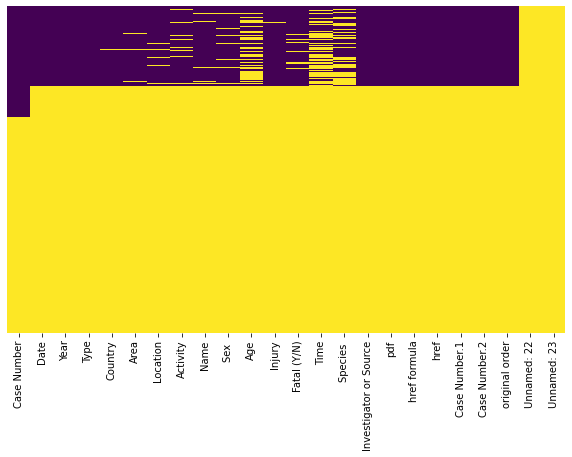

In [9]:
# Step 9 - Plot nulls diagram
plt.figure(figsize=(10, 6))

sns.heatmap(sharks.isna(),
            yticklabels=False,
            cmap='viridis',
            cbar=False)

In [10]:
# Step 10 - Create subset with relevant rows
filtered_cols = sharks.columns.drop(["Case Number", "original order"])
subset = sharks[sharks[filtered_cols].notnull().any(axis=1)]

In [11]:
# Step 11 - Fill all cells from "Unnamed 22" and "Unnamed 23" cols
subset["Unnamed: 22"].fillna("Unknown", inplace=True)
subset["Unnamed: 23"].fillna("Unknown", inplace=True)

<AxesSubplot:>

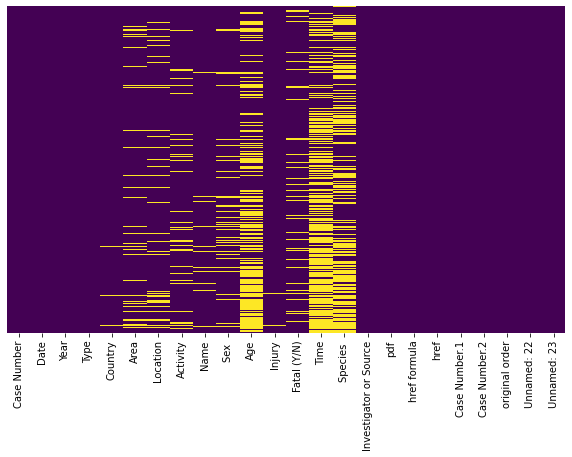

In [12]:
# Step 12 - Plot nulls diagram after changes
plt.figure(figsize=(10, 6))

sns.heatmap(subset.isna(),
            yticklabels=False,
            cmap='viridis',
            cbar=False)


In [13]:
# Step 13 - Handle "Case Number" col
subset["Case Number"].fillna("Unknown", inplace=True)

In [14]:
# Step 14 - Handle "Date" col

# Casting "Date" col to str in order to apply regex
subset["Date"] = subset["Date"].astype(str)

# Apply get_year custom  function to extract the year by regex
subset["Date"] = subset["Date"].apply(get_date)

In [15]:
# Step 15 - Handle "Year" col

# Apply get_year custom  function to extract the year by regex
# We take "Date" col instead "Year" col in order to normalize
subset["Year"] = subset["Date"].apply(get_year)

In [16]:
# Step 16 - Casting "Date" col to Numpy Period

# We avoid using pandas "pd.to_datetime" method because,
# The timespan that can be represented using a 64-bit integer,
# is limited to approximately 584 years:
# Source: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timestamp-limitations
subset["Date"] = subset["Date"].apply(lambda x: pd.Period(x, freq='ms'))


In [17]:
# Step 17 - Handle "Type" col

# Fillna
subset.Type.fillna("Unknown", inplace=True)

# Replace "Boatomg" and "Boat" values to "Boating"
subset.Type[subset.Type == "Boatomg"] = "Boating"
subset.Type[subset.Type == "Boat"] = "Boating"

# Casting "Type" col to category
subset.Type=subset.Type.astype('category')


In [18]:
# Step 18 - Handle "Country" col

# Fillna
subset.Country.fillna("Unknown", inplace=True)


In [19]:
# Step 19 - Handle "Area" col

# Add "Country" col value to null "Area" values
subset.Area[subset.Area.isnull()] = "Some area from " + subset.Country


In [20]:
# Step 20 - Handle "Location" col

# Add "Area" col value to null "Location" values
subset.Location[subset.Location.isnull()] = subset.Area


In [21]:
# Step 21 - Handle "Activity" col

# Fillna
subset.Activity.fillna("Unknown", inplace=True)

In [22]:
# Step 22 - Handle "Name" col

# Fillna
subset.Name.fillna("Unknown", inplace=True)

In [23]:
# Step 23 - Handle "Sex" col

# Casting to str in order to apply regex
subset["Sex "] = subset["Sex "].fillna("Unknown")

# Regex invalid texts with regex patterns
repl_dict = {
    "M": ["M "],
    "Unknown": [" ", ".", "nan", "lli", "N"],
}

replace_regex(repl_dict, subset, "Sex ")

# Categorize "Sex" column
subset.Sex=subset["Sex "].astype('category')
subset.Sex.unique()

['F', 'M', 'Unknown']
Categories (3, object): ['F', 'M', 'Unknown']

In [24]:
# Step 24 - Handle "Age" col

# Casting to str in order to apply regex
subset["Age"] = subset["Age"].astype(str)

# Delete invalid texts
regex_patterns=['[s]$', '[\'s]$']

for reg in regex_patterns:
    subset.Age=subset.Age.str.replace(reg, '', regex=True)

subset.Age=subset.Age.str.replace("nan", 'Unknown', regex=True)

# Casting "Age" to integer
subset["Age"] = subset["Age"].astype(int, errors="ignore")

In [25]:
# Step 25 - Handle "Injury" col

# Fillna
subset.Injury.fillna("Unknown", inplace=True)

In [27]:
# Step 26 - Handle "Fatal (Y/N)" col
subset["Fatal (Y/N)"] = subset["Fatal (Y/N)"].fillna("Unknown")

repl_dict = {
    "N": [" N", "N "],
    "Unknown": ["nan", "UNKNOWN", "2017", "M"],
    "Y": ["y"]
}

replace_regex(repl_dict, subset, "Fatal (Y/N)")

# Categorize "Fatal (Y/N)" column
subset["Fatal (Y/N)"]=subset["Fatal (Y/N)"].astype('category')


In [28]:
# Step 27 - Handle "Time" col

# Casting to str in order to apply regex
subset.Time = subset.Time.astype(str)

# Apply get_time custom function
subset.Time = subset.Time.apply(get_time)


In [29]:
# Step 28 - Handle "Species" col

# Fillna
subset["Species "].fillna("Unknown", inplace=True)

In [30]:
# Step 29 - fillna sharks datashet
sharks.fillna("Unknown", inplace=True)

In [31]:
# Step 30 - get cleaned dataframe
frames = [subset, sharks[6302:-1]]
cleaned_dataframe = pd.concat(frames)

In [32]:
cleaned_dataframe.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,2018-06-25 00:00:00.000,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,Unknown,Unknown
1,2018.06.18,2018-06-18 00:00:00.000,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,Unknown,Unknown
2,2018.06.09,2018-06-09 00:00:00.000,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,Unknown,Unknown
3,2018.06.08,2018-06-08 00:00:00.000,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Unknown,Minor injury to lower leg,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,Unknown,Unknown
4,2018.06.04,2018-06-04 00:00:00.000,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,Unknown,Unknown


<AxesSubplot:>

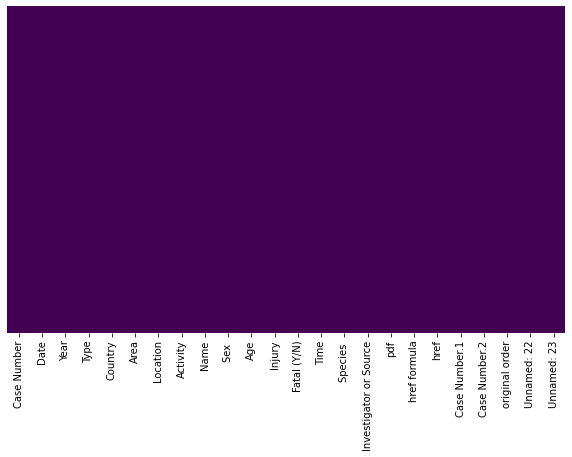

In [33]:
plt.figure(figsize=(10, 6))

sns.heatmap(sharks.isna(),
            yticklabels=False,
            cmap='viridis',
            cbar=False)